In [2]:
import pandas as pd

df = pd.read_csv("../data/bitcoin_processed.csv", parse_dates=["date"])
print(df.head())
print(df.describe())


        date          price          sma_7        sma_30        rsi  \
0 2025-01-24  104067.609912  103636.990989  97915.098142  74.430081   
1 2025-01-25  104835.192536  103733.347981  98098.106087  72.606653   
2 2025-01-26  104796.040777  103799.265841  98402.030365  73.057793   
3 2025-01-27  102552.248743  103981.681784  98676.040414  66.636507   
4 2025-01-28  101958.469537  104009.333346  98901.835417  65.047171   

     price_lag_1    price_lag_7   volatility  
0  103673.535095  100044.579268  1658.718910  
1  104067.609912  104160.693585  1712.917607  
2  104835.192536  104334.615757  1748.422969  
3  104796.040777  101275.337148  1488.500578  
4  102552.248743  101764.908602  1441.512864  
                                date          price          sma_7  \
count                            337     337.000000     337.000000   
mean   2025-07-10 23:59:41.545994240  102081.167742  102221.483116   
min              2025-01-24 00:00:00   76329.090356   80424.795358   
25%        

El dataset procesado contiene información temporal del precio de Bitcoin junto con indicadores
técnicos y variables derivadas del histórico. Los datos se encuentran limpios y listos para análisis.

In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         337 non-null    datetime64[ns]
 1   price        337 non-null    float64       
 2   sma_7        337 non-null    float64       
 3   sma_30       337 non-null    float64       
 4   rsi          337 non-null    float64       
 5   price_lag_1  337 non-null    float64       
 6   price_lag_7  337 non-null    float64       
 7   volatility   337 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 21.2 KB


,date,price,sma_7,sma_30,rsi,price_lag_1,price_lag_7,volatility
count,337,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,2025-07-10 23:59:41.545994240,102081.167742,102221.483116,102524.441698,50.793097,102128.245955,102392.913556,2074.585616
min,2025-01-24 00:00:00,76329.090356,80424.795358,83403.791925,18.213192,76329.090356,76329.090356,444.072328
25%,2025-04-18 00:00:00,91279.060572,90885.981336,93152.303952,37.675320,91344.732752,92494.176916,1258.482738
50%,2025-07-11 00:00:00,104683.424798,104273.745825,104859.228897,49.430987,104683.424798,104687.507429,1858.709606
75%,2025-10-03 00:00:00,111620.309373,111699.173432,112978.661756,61.089190,111620.309373,111620.309373,2580.507691
max,2025-12-25 22:16:21,124773.508231,122782.867695,117507.380826,88.706738,124773.508231,124773.508231,5495.742079
std,NaN,12008.953342,11734.545218,10892.480881,16.152360,11983.905024,11837.011165,1104.195606


Las estadísticas descriptivas muestran un rango amplio de precios y una variabilidad significativa,
característica de activos financieros altamente volátiles como Bitcoin.

In [7]:
import plotly.express as px

fig = px.line(df, x="date", y="price", title="Precio de Bitcoin en el tiempo")
fig.show()


El precio de Bitcoin presenta ciclos claros de crecimiento y corrección, así como periodos
de alta volatilidad, lo que sugiere un comportamiento no lineal.

In [8]:
fig = px.line(
    df,
    x="date",
    y=["price", "sma_7", "sma_30"],
    title="Precio de Bitcoin y Medias Móviles"
)
fig.show()


Las medias móviles suavizan el ruido del precio y permiten identificar tendencias a corto
y medio plazo. Los cruces entre medias móviles sugieren posibles cambios de tendencia.

In [9]:
fig = px.line(df, x="date", y="rsi", title="RSI (Relative Strength Index)")
fig.show()

El RSI muestra periodos de sobrecompra y sobreventa, lo que aporta información sobre el
momentum del mercado y posibles correcciones.

In [10]:
fig = px.line(df, x="date", y="volatility", title="Volatilidad del precio")
fig.show()

Los picos de volatilidad reflejan momentos de alta incertidumbre en el mercado, lo que refuerza
la necesidad de modelos capaces de manejar relaciones complejas.

In [11]:
fig = px.histogram(df, x="price", nbins=50, title="Distribución del precio de Bitcoin")
fig.show()

La distribución del precio no sigue una forma normal, presentando asimetría y colas largas,
características típicas de mercados financieros.

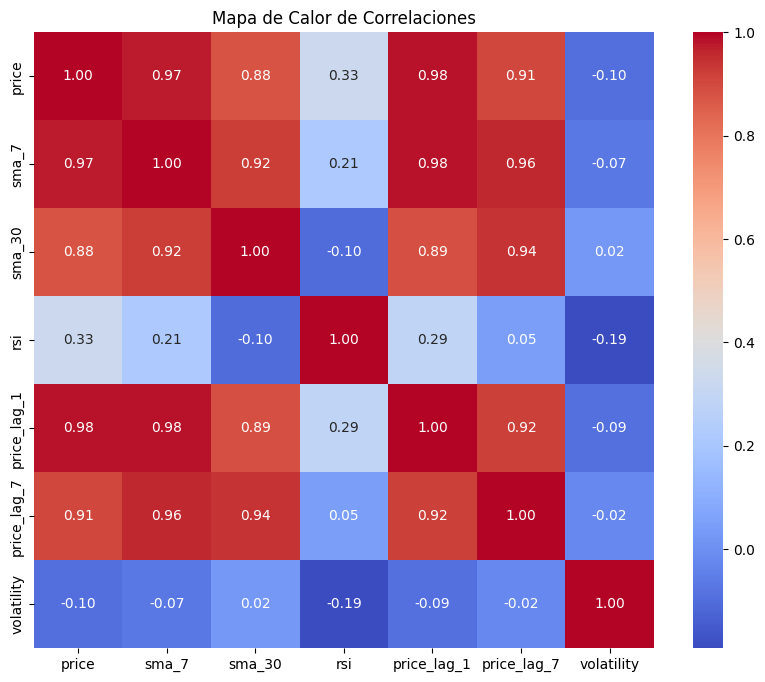

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/bitcoin_processed.csv", parse_dates=['date'])
features = ['price', 'sma_7', 'sma_30', 'rsi', 'price_lag_1', 'price_lag_7', 'volatility']
plt.figure(figsize=(10, 8))
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()


Se observa una fuerte correlación entre el precio y las variables derivadas del histórico,
lo que valida su uso como features para el modelo de predicción.

## Conclusiones del EDA

- El precio de Bitcoin muestra un comportamiento altamente volátil y no lineal.
- Los indicadores técnicos y variables históricas aportan información relevante.
- El EDA justifica el uso de modelos no lineales como Random Forest para la predicción.
- Los datos se consideran adecuados para la fase de modelado de Machine Learning.
